# Decision Tree Model

A building block to Random Forest is a Decision Tree. Decision trees start with a root node and end with a leaf node. For numeric feature, tree split on each unique value of each data.  Tree-based models may poorly handle trends in data, compared to linear models, so you have to detrend your series first, which was done in the previous part for three of the five datasets.

In [3]:
import pandas as pd
from pandas import read_csv
from matplotlib import pyplot

## Example 1:  Vacation dataset

In [4]:
# load data
df1 = pd.read_csv('vacation_lags_12months_features.csv', header=0)
df1.head()

,t-12,t-11,t-10,t-9,t-8,t-7,t-6,t-5,t-4,t-3,t-2,t-1,t
0,10.0,9.0,-2.0,-17.0,-18.0,-1.0,3.0,4.0,33.0,-6.0,-3.0,-11.0,3.0
1,9.0,-2.0,-17.0,-18.0,-1.0,3.0,4.0,33.0,-6.0,-3.0,-11.0,3.0,13.0
2,-2.0,-17.0,-18.0,-1.0,3.0,4.0,33.0,-6.0,-3.0,-11.0,3.0,13.0,-4.0
3,-17.0,-18.0,-1.0,3.0,4.0,33.0,-6.0,-3.0,-11.0,3.0,13.0,-4.0,-16.0
4,-18.0,-1.0,3.0,4.0,33.0,-6.0,-3.0,-11.0,3.0,13.0,-4.0,-16.0,-20.0


In [5]:
# Split data

vacat = df1.values
# split into lagged variables and original time series
X1= vacat[:, 0:-1]  # slice all rows and start with column 0 and go up to but not including the last column
y1 = vacat[:,-1]  # slice all rows and last column, essentially separating out 't' column

In [6]:
# Columns t-1 to t-12, which are the lagged variables
X1

array([[ 10.,   9.,  -2., ...,  -6.,  -3., -11.],
       [  9.,  -2., -17., ...,  -3., -11.,   3.],
       [ -2., -17., -18., ..., -11.,   3.,  13.],
       ...,
       [-11., -12.,  -1., ...,   1.,  11.,  -2.],
       [-12.,  -1.,   4., ...,  11.,  -2., -11.],
       [ -1.,   4.,  15., ...,  -2., -11.,  -7.]])

In [7]:
# Column t, which is the original time series
y1[0:10]

array([  3.,  13.,  -4., -16., -20.,  -2.,   3.,   3.,  30., -11.])

Below, you can alter the splits as 50-50, 60-40, 70-30, 75-25, 80-20, and 85-15, etc. So, 0.80 is a 80-20 split.

In [8]:
# Target Train-Test split
from pandas import read_csv

Y1 = y1
traintarget_size = int(len(Y1) * 0.80)   # Set split
train_target, test_target = Y1[0:traintarget_size], Y1[traintarget_size:len(Y1)]

print('Observations for Target: %d' % (len(Y1)))
print('Training Observations for Target: %d' % (len(train_target)))
print('Testing Observations for Target: %d' % (len(test_target)))

Observations for Target: 174
Training Observations for Target: 139
Testing Observations for Target: 35


In [9]:
# Features Train-Test split

trainfeature_size = int(len(X1) * 0.80)
train_feature, test_feature = X1[0:trainfeature_size], X1[trainfeature_size:len(X1)]
print('Observations for feature: %d' % (len(X1)))
print('Training Observations for feature: %d' % (len(train_feature)))
print('Testing Observations for feature: %d' % (len(test_feature)))

Observations for feature: 174
Training Observations for feature: 139
Testing Observations for feature: 35


In [10]:
# Decision Tree Regresion Model

from sklearn.tree import DecisionTreeRegressor

# Create a decision tree regression model with default arguments
decision_tree_vacat = DecisionTreeRegressor()  # max-depth not set

# Fit the model to the training features and targets
decision_tree_vacat.fit(train_feature, train_target)

# Check the score on train and test
print(decision_tree_vacat.score(train_feature, train_target))
print(decision_tree_vacat.score(test_feature,test_target))  # predictions are horrible if negative value, no relationship if 0


1.0
0.5676086433128686


In [11]:
# Find the best Max Depth

# Loop through a few different max depths and check the performance
# Try different max depths. We want to optimize our ML models to make the best predictions possible.
# For regular decision trees, max_depth, which is a hyperparameter, limits the number of splits in a tree.
# You can find the best value of max_depth based on the R-squared score of the model on the test set.

for d in [2, 3, 4, 5,7,8,10]:
    # Create the tree and fit it
    decision_tree_vacat = DecisionTreeRegressor(max_depth=d)
    decision_tree_vacat.fit(train_feature, train_target)

    # Print out the scores on train and test
    print('max_depth=', str(d))
    print(decision_tree_vacat.score(train_feature, train_target))
    print(decision_tree_vacat.score(test_feature, test_target), '\n')  # You want the test score to be positive and high
 


max_depth= 2
0.836755084049483
0.5100670898047248 

max_depth= 3
0.9202849260705976
0.5338183325628844 

max_depth= 4
0.9505108563131668
0.5424299225198469 

max_depth= 5
0.9731320934255739
0.576604361448845 

max_depth= 7
0.9945227439718145
0.5425593318028525 

max_depth= 8
0.9979417202626701
0.5567588445559395 

max_depth= 10
0.9998990581954493
0.556490175621631 



Decision-tree learners can create over-complex trees that do not generalize the data well. This is called overfitting.

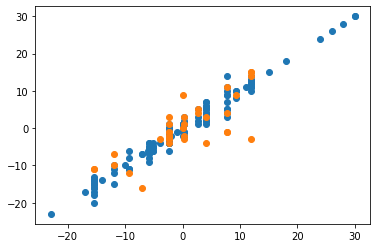

In [12]:
# Plot predicted against actual values

from matplotlib import pyplot as plt

# Use the best max_depth 
decision_tree_vacat = DecisionTreeRegressor(max_depth=5)  # fill in best max depth here
decision_tree_vacat.fit(train_feature, train_target)

# Predict values for train and test
train_prediction = decision_tree_vacat.predict(train_feature)
test_prediction = decision_tree_vacat.predict(test_feature)

# Scatter the predictions vs actual values
plt.scatter(train_prediction, train_target, label='train')  # blue
plt.scatter(test_prediction, test_target, label='test')  # orange
plt.show()

In [13]:
train_prediction.plot(figsize=(8,5))
pyplot.show()

AttributeError: 'numpy.ndarray' object has no attribute 'plot'

## Example 2: Furniture Dataset

In [12]:
# load data, this data has been stationarized
df2 = pd.read_csv('furniture_lags_12months_features.csv', header=0)
df2.head()

,t-12,t-11,t-10,t-9,t-8,t-7,t-6,t-5,t-4,t-3,t-2,t-1,t
0,0.069088,-0.002419,0.033839,0.022829,0.013640,0.011722,-0.023777,0.042725,0.043720,0.127219,-0.219927,-0.044419,0.121869
1,-0.002419,0.033839,0.022829,0.013640,0.011722,-0.023777,0.042725,0.043720,0.127219,-0.219927,-0.044419,0.121869,0.003474
2,0.033839,0.022829,0.013640,0.011722,-0.023777,0.042725,0.043720,0.127219,-0.219927,-0.044419,0.121869,0.003474,0.038723
3,0.022829,0.013640,0.011722,-0.023777,0.042725,0.043720,0.127219,-0.219927,-0.044419,0.121869,0.003474,0.038723,0.008674
4,0.013640,0.011722,-0.023777,0.042725,0.043720,0.127219,-0.219927,-0.044419,0.121869,0.003474,0.038723,0.008674,0.024956


In [13]:
# Split Data

furn = df2.values
# split into lagged variables (features) and original time series data (target)
X2= furn[:,0:-1]  # slice all rows and start with column 0 and go up to but not including the last column
y2 = furn[:,-1]  # slice all rows and last column, essentially separating out 't' column

In [14]:
# Columns t-1 to t-12, which are the lagged variables
X2

array([[ 0.06908776, -0.00241871,  0.03383942, ...,  0.12721928,
        -0.21992713, -0.04441943],
       [-0.00241871,  0.03383942,  0.02282904, ..., -0.21992713,
        -0.04441943,  0.12186938],
       [ 0.03383942,  0.02282904,  0.01364014, ..., -0.04441943,
         0.12186938,  0.00347408],
       ...,
       [ 0.08460108, -0.01831672, -0.00127104, ..., -0.01906175,
         0.17492792, -0.04829062],
       [-0.01831672, -0.00127104,  0.04903607, ...,  0.17492792,
        -0.04829062,  0.08136081],
       [-0.00127104,  0.04903607, -0.06026621, ..., -0.04829062,
         0.08136081, -0.05698937]])

In [15]:
# Column t, which is the original time series
# Give first 10 values of target variable, time series
y2[0:10]

array([ 0.12186938,  0.00347408,  0.03872338,  0.00867379,  0.02495622,
        0.01369304, -0.02164084,  0.03759901,  0.08095082,  0.09170221])

Below, you can alter the splits as 50-50, 60-40, 70-30, 75-25, 80-20, and 85-15, etc. Here we are using a 75-25 split.

In [16]:
# Target Train-Test split
from pandas import read_csv

Y2 = y2
traintarget_size = int(len(Y2) * 0.75)   # Set split
train_target, test_target = Y2[0:traintarget_size], Y2[traintarget_size:len(Y2)]

print('Observations for Target: %d' % (len(Y2)))
print('Training Observations for Target: %d' % (len(train_target)))
print('Testing Observations for Target: %d' % (len(test_target)))

Observations for Target: 317
Training Observations for Target: 237
Testing Observations for Target: 80


In [17]:
# Features Train-Test split

trainfeature_size = int(len(X2) * 0.75)
train_feature, test_feature = X2[0:trainfeature_size], X2[trainfeature_size:len(X2)]
print('Observations for feature: %d' % (len(X2)))
print('Training Observations for feature: %d' % (len(train_feature)))
print('Testing Observations for feature: %d' % (len(test_feature)))

Observations for feature: 317
Training Observations for feature: 237
Testing Observations for feature: 80


In [18]:
# Decision Tree Regression Model

from sklearn.tree import DecisionTreeRegressor

# Create a decision tree regression model with default arguments
decision_tree_furn = DecisionTreeRegressor()  # max_depth not set

# Fit the model to the training features and targets
decision_tree_furn.fit(train_feature, train_target)

# Check the score on train and test
print(decision_tree_furn.score(train_feature, train_target))
print(decision_tree_furn.score(test_feature,test_target))  # predictions are horrible if negative value, no relationship if 0


1.0
0.7877942032088927


In [19]:
# Find Best Max Depth

# Loop through a few different max depths and check the performance
# Try different max depths. We want to optimize our ML models to make the best predictions possible.
# For regular decision trees, max_depth, which is a hyperparameter, limits the number of splits in a tree.
# You can find the best value of max_depth based on the R-squared score of the model on the test set.

for d in [2, 3,4, 5,7,8,10]:
    # Create the tree and fit it
    decision_tree_furn = DecisionTreeRegressor(max_depth=d)
    decision_tree_furn.fit(train_feature, train_target)

    # Print out the scores on train and test
    print('max_depth=', str(d))
    print(decision_tree_furn.score(train_feature, train_target))
    print(decision_tree_furn.score(test_feature, test_target), '\n')  # You want the test score to be positive
    
# R-square for train and test scores are below. 

max_depth= 2
0.8156377078263332
0.7810130722918899 

max_depth= 3
0.8863883454069654
0.8632482324245954 

max_depth= 4
0.9135800361483105
0.8591272933171432 

max_depth= 5
0.9393751803685487
0.8673987603923319 

max_depth= 7
0.9750119687499313
0.8093626902314203 

max_depth= 8
0.9864459830278838
0.7879216878521809 

max_depth= 10
0.9969880725037887
0.794427379169911 



The best max_depth is max_depth is the one that gives the best test score (positive and high).  Decision-tree learners can create over-complex trees that do not generalize the data well. This is called overfitting.

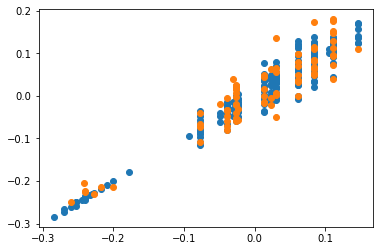

In [20]:
# Plot predicted against actual values

from matplotlib import pyplot as plt

# Use the best max_depth 
decision_tree_furn = DecisionTreeRegressor(max_depth=5) # Fill in best max depth score here
decision_tree_furn.fit(train_feature, train_target)

# Predict values for train and test
train_prediction = decision_tree_furn.predict(train_feature)
test_prediction = decision_tree_furn.predict(test_feature)

# Scatter the predictions vs actual values, orange is predicted
plt.scatter(train_prediction, train_target, label='train')  # blue 
plt.scatter(test_prediction, test_target, label='test')  
plt.show()


## Example 3:  Bank of America Dataset

In [14]:
# load data, this data has been stationarized
df3 = pd.read_csv('bac_lags_12months_features.csv', header=0)
df3.head()

,t-12,t-11,t-10,t-9,t-8,t-7,t-6,t-5,t-4,t-3,t-2,t-1,t
0,1.687537,1.469485,1.441042,1.525887,1.476664,1.412676,1.341841,0.879137,0.709480,0.987102,1.002662,1.232781,1.282093
1,1.469485,1.441042,1.525887,1.476664,1.412676,1.341841,0.879137,0.709480,0.987102,1.002662,1.232781,1.282093,1.595426
2,1.441042,1.525887,1.476664,1.412676,1.341841,0.879137,0.709480,0.987102,1.002662,1.232781,1.282093,1.595426,1.699101
3,1.525887,1.476664,1.412676,1.341841,0.879137,0.709480,0.987102,1.002662,1.232781,1.282093,1.595426,1.699101,1.941008
4,1.476664,1.412676,1.341841,0.879137,0.709480,0.987102,1.002662,1.232781,1.282093,1.595426,1.699101,1.941008,1.707245


In [15]:
# Split Data

bac = df3.values
# split into lagged variables (features) and original time series data (target)
X3= bac[:,0:-1]  # slice all rows and start with column 0 and go up to but not including the last column
y3 = bac[:,-1]  # slice all rows and last column, essentially separating out 't' column

In [16]:
# Columns t-1 to t-12, which are the lagged variables
X3

array([[ 1.68753707,  1.46948457,  1.44104242, ...,  0.98710191,
         1.00266206,  1.23278129],
       [ 1.46948457,  1.44104242,  1.52588725, ...,  1.00266206,
         1.23278129,  1.28209293],
       [ 1.44104242,  1.52588725,  1.47666395, ...,  1.23278129,
         1.28209293,  1.59542644],
       ...,
       [30.09263229, 28.80098343, 26.88482857, ..., 26.28380585,
        28.81011391, 30.47911263],
       [28.80098343, 26.88482857, 27.76469421, ..., 28.81011391,
        30.47911263, 27.32987022],
       [26.88482857, 27.76469421, 24.22343063, ..., 30.47911263,
        27.32987022, 29.17000008]])

In [17]:
# Column t, which is the original time series
# Give first 10 values of target variable, time series
y3[0:10]

array([1.28209293, 1.59542644, 1.69910097, 1.94100773, 1.70724475,
       1.65948939, 1.91634405, 1.76750135, 1.85432637, 1.70548344])

In [18]:
# Target Train-Test split
from pandas import read_csv

Y3 = y3
traintarget_size = int(len(Y3) * 0.75)   # Set split
train_target, test_target = Y3[0:traintarget_size], Y3[traintarget_size:len(Y3)]

print('Observations for Target: %d' % (len(Y3)))
print('Training Observations for Target: %d' % (len(train_target)))
print('Testing Observations for Target: %d' % (len(test_target)))

Observations for Target: 345
Training Observations for Target: 258
Testing Observations for Target: 87


In [19]:
# Features Train-Test split

trainfeature_size = int(len(X3) * 0.75)
train_feature, test_feature = X3[0:trainfeature_size], X3[trainfeature_size:len(X3)]
print('Observations for feature: %d' % (len(X3)))
print('Training Observations for feature: %d' % (len(train_feature)))
print('Testing Observations for feature: %d' % (len(test_feature)))

Observations for feature: 345
Training Observations for feature: 258
Testing Observations for feature: 87


In [20]:
# Decision Tree Regression Model

from sklearn.tree import DecisionTreeRegressor

# Create a decision tree regression model with default arguments
decision_tree_bac = DecisionTreeRegressor()  # max_depth not set

# Fit the model to the training features and targets
decision_tree_bac.fit(train_feature, train_target)

# Check the score on train and test
print(decision_tree_bac.score(train_feature, train_target))
print(decision_tree_bac.score(test_feature,test_target))  # predictions are horrible if negative value, no relationship if 0


1.0
0.9051003673955429


In [21]:
# Find Best Max Depth

# Loop through a few different max depths and check the performance
# Try different max depths. We want to optimize our ML models to make the best predictions possible.
# For regular decision trees, max_depth, which is a hyperparameter, limits the number of splits in a tree.
# You can find the best value of max_depth based on the R-squared score of the model on the test set.

for d in [2, 3,4, 5,7,8,10]:
    # Create the tree and fit it
    decision_tree_bac = DecisionTreeRegressor(max_depth=d)
    decision_tree_bac.fit(train_feature, train_target)

    # Print out the scores on train and test
    print('max_depth=', str(d))
    print(decision_tree_bac.score(train_feature, train_target))
    print(decision_tree_bac.score(test_feature, test_target), '\n')  # You want the test score to be positive
    
# R-square for train and test scores are below. 

max_depth= 2
0.9378916189370204
0.8319966734609072 

max_depth= 3
0.9762695646725686
0.9340343778452677 

max_depth= 4
0.9862060481571318
0.9543748902590434 

max_depth= 5
0.993049941112901
0.9216419819007288 

max_depth= 7
0.9985248221522022
0.891727714611686 

max_depth= 8
0.999461138644182
0.8896077707322024 

max_depth= 10
0.9999516846017652
0.9123303361347154 



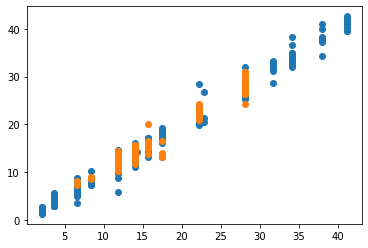

In [22]:
# Plot predicted against actual values

from matplotlib import pyplot as plt

# Use the best max_depth 
decision_tree_bac = DecisionTreeRegressor(max_depth=4) 
decision_tree_bac.fit(train_feature, train_target)

# Predict values for train and test
train_prediction = decision_tree_bac.predict(train_feature)
test_prediction = decision_tree_bac.predict(test_feature)

# Scatter the predictions vs actual values
plt.scatter(train_prediction, train_target, label='train')
plt.scatter(test_prediction, test_target, label='test')
plt.show()

## Example 4:  J.P. Morgan Dataset

In [ ]:
# load data
df4 = pd.read_csv('~/Desktop/section_4/jpm_lags_12months_features.csv', header=0)
df4.head()

In [ ]:
# split data

jpm = df4.values
# split into lagged variables and original time series
X4= jpm[:, 0:-1]  # slice all rows and start with column 0 and go up to but not including the last column
y4 = jpm[:,-1]  # slice all rows and last column, essentially separating out 't' column

In [ ]:
# Columns t-1 to t-12, which are the lagged variables
X4

In [ ]:
# Column t, which is the original time series
y4[0:10]

In [ ]:
# Target Train-Test split
from pandas import read_csv

Y4 = y4
traintarget_size = int(len(Y4) * 0.50)   # Set split
train_target, test_target = Y4[0:traintarget_size], Y4[traintarget_size:len(Y4)]

print('Observations for Target: %d' % (len(Y4)))
print('Training Observations for Target: %d' % (len(train_target)))
print('Testing Observations for Target: %d' % (len(test_target)))

In [ ]:
# Features Train-Test split

trainfeature_size = int(len(X4) * 0.50)
train_feature, test_feature = X4[0:trainfeature_size], X4[trainfeature_size:len(X4)]
print('Observations for feature: %d' % (len(X4)))
print('Training Observations for feature: %d' % (len(train_feature)))
print('Testing Observations for feature: %d' % (len(test_feature)))

In [ ]:
# Decision Tree Regression Model
from sklearn.tree import DecisionTreeRegressor

# Create a decision tree regression model with default arguments
decision_tree_jpm = DecisionTreeRegressor()  # max-depth not set

# Fit the model to the training features and targets
decision_tree_jpm.fit(train_feature, train_target)

# Check the score on train and test
print(decision_tree_jpm.score(train_feature, train_target))
print(decision_tree_jpm.score(test_feature,test_target))  # predictions are horrible if negative value, no relationship if 0


In [ ]:
# Find Best max depth

# Loop through a few different max depths and check the performance
# Try different max depths. We want to optimize our ML models to make the best predictions possible.
# For regular decision trees, max_depth, which is a hyperparameter, limits the number of splits in a tree.
# You can find the best value of max_depth based on the R-squared score of the model on the test set.

for d in [2, 3,4, 5,7,8,10]:
    # Create the tree and fit it
    decision_tree_jpm = DecisionTreeRegressor(max_depth=d)
    decision_tree_jpm.fit(train_feature, train_target)

    # Print out the scores on train and test
    print('max_depth=', str(d))
    print(decision_tree_jpm.score(train_feature, train_target))
    print(decision_tree_jpm.score(test_feature, test_target), '\n')  
    # You want the test score to be positive and high
 

In [ ]:
# Plot predicted against actual values

from matplotlib import pyplot as plt

# Use the best max_depth 
decision_tree_jpm = DecisionTreeRegressor(max_depth=4)
decision_tree_jpm.fit(train_feature, train_target)

# Predict values for train and test
train_prediction = decision_tree_jpm.predict(train_feature)
test_prediction = decision_tree_jpm.predict(test_feature)

# Scatter the predictions vs actual values
plt.scatter(train_prediction, train_target, label='train')
plt.scatter(test_prediction, test_target, label='test')
plt.show()

## Example 5:  Average Temperature Dataset

In [ ]:
# load data
df5 = pd.read_csv('~/Desktop/section_4/temp_lags_12months_features.csv', header=0)
df5.head()

In [ ]:
temp = df5.values
# split into lagged variables and original time series
X5= temp[:,0:-1]  # slice all rows and start with column 0 and go up to but not including the last column
y5 = temp[:,-1]  # slice all rows and last column, essentially separating out 't' column

In [ ]:
# Columns t-1 to t-12, which are the lagged variables
X5

In [ ]:
# Column t, which is the original time series
y5[0:10]

In [ ]:
# Target Train-Test split
from pandas import read_csv

Y5 = y5
traintarget_size = int(len(Y5) * 0.80)   # Set split
train_target, test_target = Y5[0:traintarget_size], Y5[traintarget_size:len(Y5)]

print('Observations for Target: %d' % (len(Y5)))
print('Training Observations for Target: %d' % (len(train_target)))
print('Testing Observations for Target: %d' % (len(test_target)))

In [ ]:
# Features Train-Test split

trainfeature_size = int(len(X5) * 0.80)
train_feature, test_feature = X5[0:trainfeature_size], X5[trainfeature_size:len(X5)]
print('Observations for feature: %d' % (len(X5)))
print('Training Observations for feature: %d' % (len(train_feature)))
print('Testing Observations for feature: %d' % (len(test_feature)))

In [ ]:
# Decision Tree Regression Model

from sklearn.tree import DecisionTreeRegressor

# Create a decision tree regression model with default arguments
decision_tree_temp = DecisionTreeRegressor()  # max-depth not set

# Fit the model to the training features and targets
decision_tree_temp.fit(train_feature, train_target)

# Check the score on train and test
print(decision_tree_temp.score(train_feature, train_target))
print(decision_tree_temp.score(test_feature,test_target))  # predictions are horrible if negative value, no relationship if 0


In [ ]:
# Find best max depth

# Loop through a few different max depths and check the performance
# Try different max depths. We want to optimize our ML models to make the best predictions possible.
# For regular decision trees, max_depth, which is a hyperparameter, limits the number of splits in a tree.
# You can find the best value of max_depth based on the R-squared score of the model on the test set.

for d in [2, 3, 4, 5,7,8,10]:
    # Create the tree and fit it
    decision_tree_temp = DecisionTreeRegressor(max_depth=d)
    decision_tree_temp.fit(train_feature, train_target)

    # Print out the scores on train and test
    print('max_depth=', str(d))
    print(decision_tree_temp.score(train_feature, train_target))
    print(decision_tree_temp.score(test_feature, test_target), '\n')  # You want the test score to be positive and high
 


In [ ]:
from matplotlib import pyplot as plt

# Use the best max_depth 
decision_tree_temp = DecisionTreeRegressor(max_depth=4)
decision_tree_temp.fit(train_feature, train_target)

# Predict values for train and test
train_prediction = decision_tree_temp.predict(train_feature)
test_prediction = decision_tree_temp.predict(test_feature)

# Scatter the predictions vs actual values
plt.scatter(train_prediction, train_target, label='train')
plt.scatter(test_prediction, test_target, label='test')
plt.show()

## Summary

In summary, we looked at a decision tree model on both datasets that consisted of 12 lagged variables.  The datasets were split into features and target. It was further split according to a training and test datasets. We determined that the best max_depth based on the best R-squared score on the test dataset model, which was max_depth with the highest and positive score. The max_depth determines the number of splits and is, essentially, the height of the tree. The scatterplot displays both the predicted and actual values. The decision tree models predicted training data better than test data.

In [ ]:
# End